In [21]:
import legateboost as lb
import numpy as np
import cunumeric as cn
import xgboost as xgb

from sklearn.datasets import fetch_covtype
X,y = fetch_covtype(return_X_y=True)
y = y - 1

n_estimators = 100
max_depth = 10
learning_rate = 0.1

In [22]:
xgb_model = xgb.XGBClassifier(n_estimators=n_estimators,max_depth=max_depth,tree_method='hist', learning_rate=learning_rate).fit(X, y, eval_set=[(X, y)])
xgb_metrics = xgb_model.evals_result()


[0]	validation_0-mlogloss:1.72305
[1]	validation_0-mlogloss:1.55222
[2]	validation_0-mlogloss:1.41448
[3]	validation_0-mlogloss:1.29986
[4]	validation_0-mlogloss:1.20250
[5]	validation_0-mlogloss:1.11808
[6]	validation_0-mlogloss:1.04400
[7]	validation_0-mlogloss:0.97815
[8]	validation_0-mlogloss:0.91963
[9]	validation_0-mlogloss:0.86721
[10]	validation_0-mlogloss:0.82035
[11]	validation_0-mlogloss:0.77758
[12]	validation_0-mlogloss:0.73870
[13]	validation_0-mlogloss:0.70365
[14]	validation_0-mlogloss:0.67170
[15]	validation_0-mlogloss:0.64293
[16]	validation_0-mlogloss:0.61665
[17]	validation_0-mlogloss:0.59273
[18]	validation_0-mlogloss:0.57079
[19]	validation_0-mlogloss:0.55093
[20]	validation_0-mlogloss:0.53259
[21]	validation_0-mlogloss:0.51598
[22]	validation_0-mlogloss:0.50093
[23]	validation_0-mlogloss:0.48718
[24]	validation_0-mlogloss:0.47457
[25]	validation_0-mlogloss:0.46266
[26]	validation_0-mlogloss:0.45176
[27]	validation_0-mlogloss:0.44171
[28]	validation_0-mlogloss:0.4

In [23]:
lb_model = lb.LBClassifier(n_estimators=n_estimators,max_depth=max_depth,verbose=True, learning_rate=learning_rate).fit(X,y)


i: 0 logloss: 1.4316134008642554
i: 1 logloss: 1.2501377452329487
i: 2 logloss: 1.110383653357355
i: 3 logloss: 1.0009955886469168
i: 4 logloss: 0.9153199759604599
i: 5 logloss: 0.8430545190174072
i: 6 logloss: 0.7892218586846023
i: 7 logloss: 0.7392949986440607
i: 8 logloss: 0.7005372970422306
i: 9 logloss: 0.6656333241138832
i: 10 logloss: 0.6317340634215795
i: 11 logloss: 0.6033900356224037
i: 12 logloss: 0.5783364107130585
i: 13 logloss: 0.559044117364572
i: 14 logloss: 0.5390933286514804
i: 15 logloss: 0.5225375823361542
i: 16 logloss: 0.5047995470437697
i: 17 logloss: 0.490792711557174
i: 18 logloss: 0.4771869692643541
i: 19 logloss: 0.46536713250921996
i: 20 logloss: 0.45316386367338113
i: 21 logloss: 0.4416392121561408
i: 22 logloss: 0.4330256126900466
i: 23 logloss: 0.42301652371631954
i: 24 logloss: 0.4138110637641543
i: 25 logloss: 0.40599866182473465
i: 26 logloss: 0.39868945870320005
i: 27 logloss: 0.39227408490763604
i: 28 logloss: 0.3860077879078677
i: 29 logloss: 0.3781

Text(0, 0.5, 'logloss')

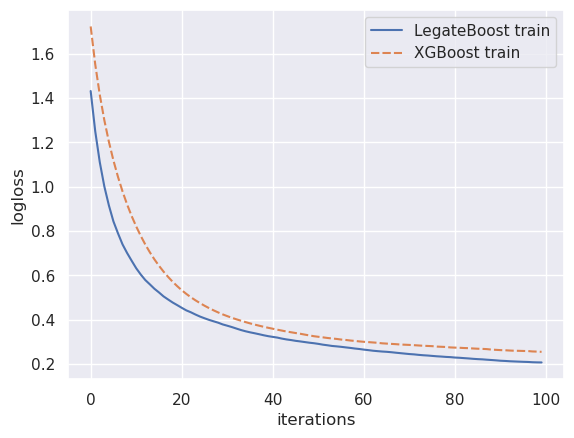

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
data = {"LegateBoost train": lb_model.train_metric_, "XGBoost train": xgb_metrics['validation_0']['mlogloss']}	
sns.lineplot(data=data)
plt.xlabel("iterations")
plt.ylabel("logloss")
